In [2]:
import cobra
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from pathlib import Path
import sys
sys.path.append('../code/')
import leakage, utils
import seaborn as sns
from matplotlib import cm, colors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib
import matplotlib.gridspec as gridspec


# Plot disitrbutions of leakage rates and shadow prices

For each fo the 4 species:
- plot the disitrbution of leakage rates
- plot the distribution of (median) shadow prices
- Evaluate their normality


In [7]:
def params_to_fn(species, timestr, only_significant_changes = False, knock_outs = False,
    shadow_price_for_leaked_mets = True, ):
    #################
    if only_significant_changes:
        s1 = '_osc'
    else:
        s1 = ''

    if shadow_price_for_leaked_mets:
        s2 = '_SP_for_leaked'
    else:
        s2 = ''

    if knock_outs:
        s3 = '_KO'
    else:
        s3 = ''
        
    folder = Path('../results/{0}/'.format(species))
    fn = 'spreadsheet_{0}_leakage_{1}{2}{3}{4}.csv'.format(species, timestr, s1, s2, s3)
    return folder / fn

# Load data

## E. coli

In [116]:
# timepoints = np.arange(4.5, 9, 1)
species = 'e_coli'
ec_timestr = '20230703'#'20230629'
path = params_to_fn(species, ec_timestr, only_significant_changes=False, knock_outs=False, shadow_price_for_leaked_mets=True)
ec_df = pd.read_csv(path, index_col = 0)
ec_df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Yeast

In [117]:
# df = pd.read_csv('spreadsheet_ecoli_leakage_and_info_230626_owd_significant.csv', index_col = 0)

# timepoints = np.arange(0.5, 12, 1)
species = 'yeast'
yeast_timestr = '20230705'
path = params_to_fn(species, yeast_timestr, only_significant_changes=False, knock_outs=False, shadow_price_for_leaked_mets=True)
yeast_df = pd.read_csv(path, index_col = 0)
yeast_df.replace([np.inf, -np.inf], np.nan, inplace=True)

## B. licheniformis

In [118]:
# timepoints = np.arange(1.5, 17, 1)

species = 'b_licheniformis'
bl_timestr = '20230704'

path = params_to_fn(species, bl_timestr, only_significant_changes=False, knock_outs=False, shadow_price_for_leaked_mets=True)
bl_df = pd.read_csv(path, index_col = 0)
bl_df.replace([np.inf, -np.inf], np.nan, inplace=True)

## C. glutamicum

In [119]:
# df = pd.read_csv('spreadsheet_ecoli_leakage_and_info_230626_owd_significant.csv', index_col = 0)
# timepoints = np.arange(1.5, 18, 1)
species = 'c_glutamicum'
cg_timestr = '20230717'
path = params_to_fn(species, cg_timestr, only_significant_changes=False, knock_outs=False, shadow_price_for_leaked_mets=True)
cg_df = pd.read_csv(path, index_col = 0)
cg_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot leakage distributions

/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: overflow encountered in true_divide
  x = asarray((x-loc) / scale)
/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: overflow encountered in true_divide
  x = asarray((x-loc) / scale)


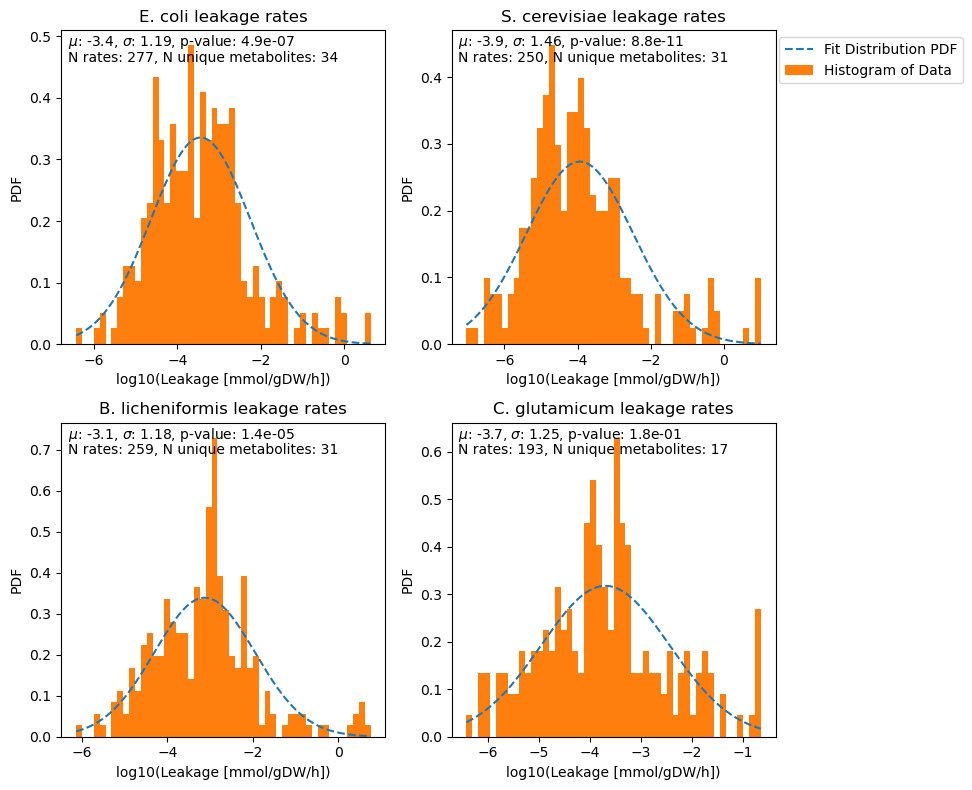

In [129]:
fig, axes = plt.subplots(2,2, figsize = (10,8), sharex = False, sharey = False)

# Distribution
dist = st.norm

# E.coli
ec_df_nan = ec_df.reset_index().dropna(subset = ['log10(Leakage [mmol/gDW/h])'])
# sns.histplot(data = ec_df_nan, x = 'log10(Leakage [mmol/gDW/h])', bins = 30, ax = axes[0,0])#, hue = 'Time', fill = False)#histplot
ec_fit = st.fit(dist, ec_df_nan['log10(Leakage [mmol/gDW/h])'], bounds=[[-6, -2], [0, 4]])
ec_fit.plot(ax = axes[0,0])
ec_norm = st.normaltest(ec_df_nan['log10(Leakage [mmol/gDW/h])'])
axes[0,0].text(0.02, 0.95, r"$\mu$: {0:.1f}, $\sigma$: {1:.2f}, p-value: {2:.1e}".format(ec_fit.params.loc, ec_fit.params.scale, ec_norm.pvalue),  transform=axes[0,0].transAxes, horizontalalignment='left')
axes[0,0].text(0.02, 0.9, r"N rates: {0}, N unique metabolites: {1}".format(len(ec_df_nan), len(ec_df_nan['Metabolite name'].unique())),  transform=axes[0,0].transAxes, horizontalalignment='left')

# axes[0,0]
axes[0,0].get_legend().remove()


yeast_df_nan = yeast_df.reset_index().dropna(subset = ['log10(Leakage [mmol/gDW/h])'])
# sns.histplot(data = yeast_df_nan, x = 'log10(Leakage [mmol/gDW/h])', bins = 30, ax = axes[0,1])#, hue = 'Time', fill = False)#histplot
yeast_fit = st.fit(dist, yeast_df_nan['log10(Leakage [mmol/gDW/h])'], bounds=[[-6, -2], [0, 4]])
yeast_fit.plot(ax = axes[0,1])
yeast_norm = st.normaltest(yeast_df_nan['log10(Leakage [mmol/gDW/h])'])
axes[0,1].text(0.02, 0.95, r"$\mu$: {0:.1f}, $\sigma$: {1:.2f}, p-value: {2:.1e}".format(yeast_fit.params.loc, yeast_fit.params.scale, yeast_norm.pvalue),  transform=axes[0,1].transAxes, horizontalalignment='left')
axes[0,1].text(0.02, 0.9, r"N rates: {0}, N unique metabolites: {1}".format(len(yeast_df_nan), len(yeast_df_nan['Metabolite name'].unique())),  transform=axes[0,1].transAxes, horizontalalignment='left')

l = axes[0,1].get_legend()#.remove()
l.set_transform(axes[0,1].transAxes)
l.set_bbox_to_anchor((1.6, 1))

bl_df_nan = bl_df.reset_index().dropna(subset = ['log10(Leakage [mmol/gDW/h])'])
# sns.histplot(data = bl_df_nan, x = 'log10(Leakage [mmol/gDW/h])', bins = 30, ax = axes[1,0])#, hue = 'Time', fill = False)#histplot
bl_fit = st.fit(dist, bl_df_nan['log10(Leakage [mmol/gDW/h])'], bounds=[[-6, -2], [0, 4]])
bl_fit.plot(ax = axes[1,0])
bl_norm = st.normaltest(bl_df_nan['log10(Leakage [mmol/gDW/h])'])
axes[1,0].text(0.02, 0.95, r"$\mu$: {0:.1f}, $\sigma$: {1:.2f}, p-value: {2:.1e}".format(bl_fit.params.loc, bl_fit.params.scale, bl_norm.pvalue),  transform=axes[1,0].transAxes, horizontalalignment='left')
axes[1,0].text(0.02, 0.9, r"N rates: {0}, N unique metabolites: {1}".format(len(bl_df_nan), len(bl_df_nan['Metabolite name'].unique())),  transform=axes[1,0].transAxes, horizontalalignment='left')

axes[1,0].get_legend().remove()


cg_df_nan = cg_df.reset_index().dropna(subset = ['log10(Leakage [mmol/gDW/h])'])
# sns.histplot(data = cg_df_nan, x = 'log10(Leakage [mmol/gDW/h])', bins = 30, ax = axes[1,1])#, hue = 'Time', fill = False)#histplot
cg_fit = st.fit(dist, cg_df_nan['log10(Leakage [mmol/gDW/h])'], bounds=[[-6, -2], [0, 4]])
cg_fit.plot(ax = axes[1,1])
cg_norm = st.normaltest(cg_df_nan['log10(Leakage [mmol/gDW/h])'])

axes[1,1].text(0.02, 0.95, r"$\mu$: {0:.1f}, $\sigma$: {1:.2f}, p-value: {2:.1e}".format(cg_fit.params.loc, cg_fit.params.scale, cg_norm.pvalue),  transform=axes[1,1].transAxes, horizontalalignment='left')
axes[1,1].text(0.02, 0.9, r"N rates: {0}, N unique metabolites: {1}".format(len(cg_df_nan), len(cg_df_nan['Metabolite name'].unique())),  transform=axes[1,1].transAxes, horizontalalignment='left')

axes[1,1].get_legend().remove()


axes[0,0].set_title('E. coli leakage rates')
axes[0,1].set_title('S. cerevisiae leakage rates')
axes[1,0].set_title('B. licheniformis leakage rates')
axes[1,1].set_title('C. glutamicum leakage rates')

axes[0,0].set_xlabel('log10(Leakage [mmol/gDW/h])')
axes[0,1].set_xlabel('log10(Leakage [mmol/gDW/h])')
axes[1,0].set_xlabel('log10(Leakage [mmol/gDW/h])')
axes[1,1].set_xlabel('log10(Leakage [mmol/gDW/h])')

plt.tight_layout()

# l.set_transform(axes[1,])

In [149]:
# st.kstest(ec_df_nan['log10(Leakage [mmol/gDW/h])'], yeast_df_nan['log10(Leakage [mmol/gDW/h])'])

df_name = {'E. coli': ec_df_nan,
           'S. cerevisiae': yeast_df_nan,
           'B. licheniformis': bl_df_nan,
           'C. glutamicum': cg_df_nan}

for key1, df1 in df_name.items():
    for key2, df2 in df_name.copy().items():
        if key1 != key2:
            res = st.ks_2samp(df1['log10(Leakage [mmol/gDW/h])'], df2['log10(Leakage [mmol/gDW/h])'])
            print(key1, key2, "{0:.2e}".format(res.pvalue))
            # pass

E. coli S. cerevisiae 4.20e-07
E. coli B. licheniformis 2.57e-04
E. coli C. glutamicum 3.53e-02
S. cerevisiae E. coli 4.20e-07
S. cerevisiae B. licheniformis 9.04e-15
S. cerevisiae C. glutamicum 8.56e-03
B. licheniformis E. coli 2.57e-04
B. licheniformis S. cerevisiae 9.04e-15
B. licheniformis C. glutamicum 8.65e-09
C. glutamicum E. coli 3.53e-02
C. glutamicum S. cerevisiae 8.56e-03
C. glutamicum B. licheniformis 8.65e-09


# Shadow prices

In [150]:
ec_df.columns

Index(['Metabolite name', 'Metabolite id', 'Mass', 'Charge', 'Phosphate',
       'Topological Polar Surface Area []', 'Concentration', 'log P',
       'Leakage (mmol/gDW/h)', 'Time', 'Glucose', 'Predicted growth rate',
       'Shadow price', 'Turnover', 'Median log10(-Shadow price)',
       'Low log10(-Shadow price)', 'High log10(-Shadow price)',
       'Uptake (mmol/gDW/h)', 'log10(Leakage [mmol/gDW/h])',
       'log10(-Shadow price [gDW/mmol])', 'log10(Turnover [mmol/gDW/h])'],
      dtype='object')

NormaltestResult(statistic=17.401300610174395, pvalue=0.00016647751460395426)


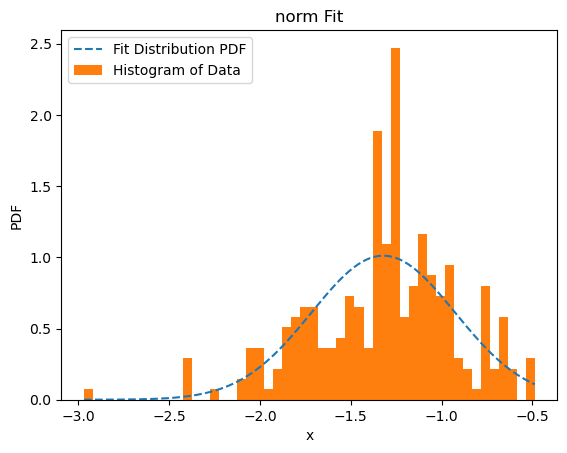

In [177]:
ec_df_nan = ec_df.reset_index().dropna(subset = ['log10(-Shadow price [gDW/mmol])'])
# ec_fit = st.fit(dist, ec_df_nan['Median log10(-Shadow price)'], bounds=[[-6, 0], [0, 4]])

ec_fit = st.fit(dist, ec_df_nan['log10(-Shadow price [gDW/mmol])'], bounds=[[-6, 0], [0, 4]])

ec_fit.plot()
ec_norm = st.normaltest(ec_df_nan['log10(-Shadow price [gDW/mmol])'])

# ec_norm = st.normaltest(ec_df_nan['Low log10(-Shadow price)'])
print(ec_norm)

In [113]:
bl_df_nan.shape

(259, 22)

In [50]:
ec_fit.params.loc

-3.4320615321016774

In [56]:
ec_norm = st.normaltest(ec_df_nan['log10(Leakage [mmol/gDW/h])'])
ec_norm.pvalue


4.88242969015857e-07